In [15]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import QTable
from scipy.stats import kde
from tqdm.notebook import tqdm
import pandas as pd
from astropy.table import Table

In [16]:
fossil1 = []
#fossil2 =[]
nonfossil =[]
for grupos in range(len(groups[1])):
    x = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][grupos]] #aqui se ordenan las magnitudes de los subhalos
    x.sort
    if abs(min(x)-x[1]) >= 2: #se comparan magnitudes de subhalos por grupo
        fossil1.append(groups[0][0][grupos])
    #elif abs(min(x)-x[3]) >= 2.5:
    #    fossil2.append(i)
    else:
        nonfossil.append(groups[0][0][grupos])
#fossil1 = fossil1[0]
#nonfossil = nonfossil[0]

In [17]:
subhalosfossil = []
subhalosnonfossil = []
for i in range(len(fossil1)):
    subhalosfossil.append([])
for i in range(len(nonfossil)):
    subhalosnonfossil.append([])

for i in range(len(fossil1)):
    subhalosfossil[i] = np.where((subhalos['SubhaloGrNr'] == fossil1[i]) & ((np.log10(subhalos['SubhaloMass'])/0.67 + 10) > 9.5))[0]

for i in range(len(nonfossil)):
    subhalosnonfossil[i] = np.where((subhalos['SubhaloGrNr'] == nonfossil[i]) & ((np.log10(subhalos['SubhaloMass'])/0.67 + 10) > 9.5))[0]

In [18]:
groups_df = pd.DataFrame()
groups_df['number'] = groups[0][0]
groups_df['subhalos'] = groups[1]

In [29]:
fossil_df = groups_df[groups_df['number'].isin(fossil1)]
nonfossil_df = groups_df[groups_df['number'].isin(nonfossil)]

In [31]:
#This function is for read subhalos string to float
def read_sh(indice, tabla, columna):
    a = np.array(tabla[columna][indice][1:-1].split(','))
    a = a.astype(int)
    a = list(a)
    return(a)

In [30]:
fossil_df.to_csv('fossil.csv')
nonfossil_df.to_csv('nonfossil.csv')

In [28]:
fossil_df = pd.read_csv('fossil.csv')

In [32]:
for i in tqdm(range(len(fossil_df))):
    fossil_df['subhalos'][i] = read_sh(i, fossil_df, 'subhalos')
    #nonfossil_df['subhalos'][i] = np.array(nf['subhalos'][i][1:-1].split(',')).astype(float)

  0%|          | 0/68 [00:00<?, ?it/s]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
fossil_df.iloc[0,1]

0

# Estos son los graficos hermosos

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


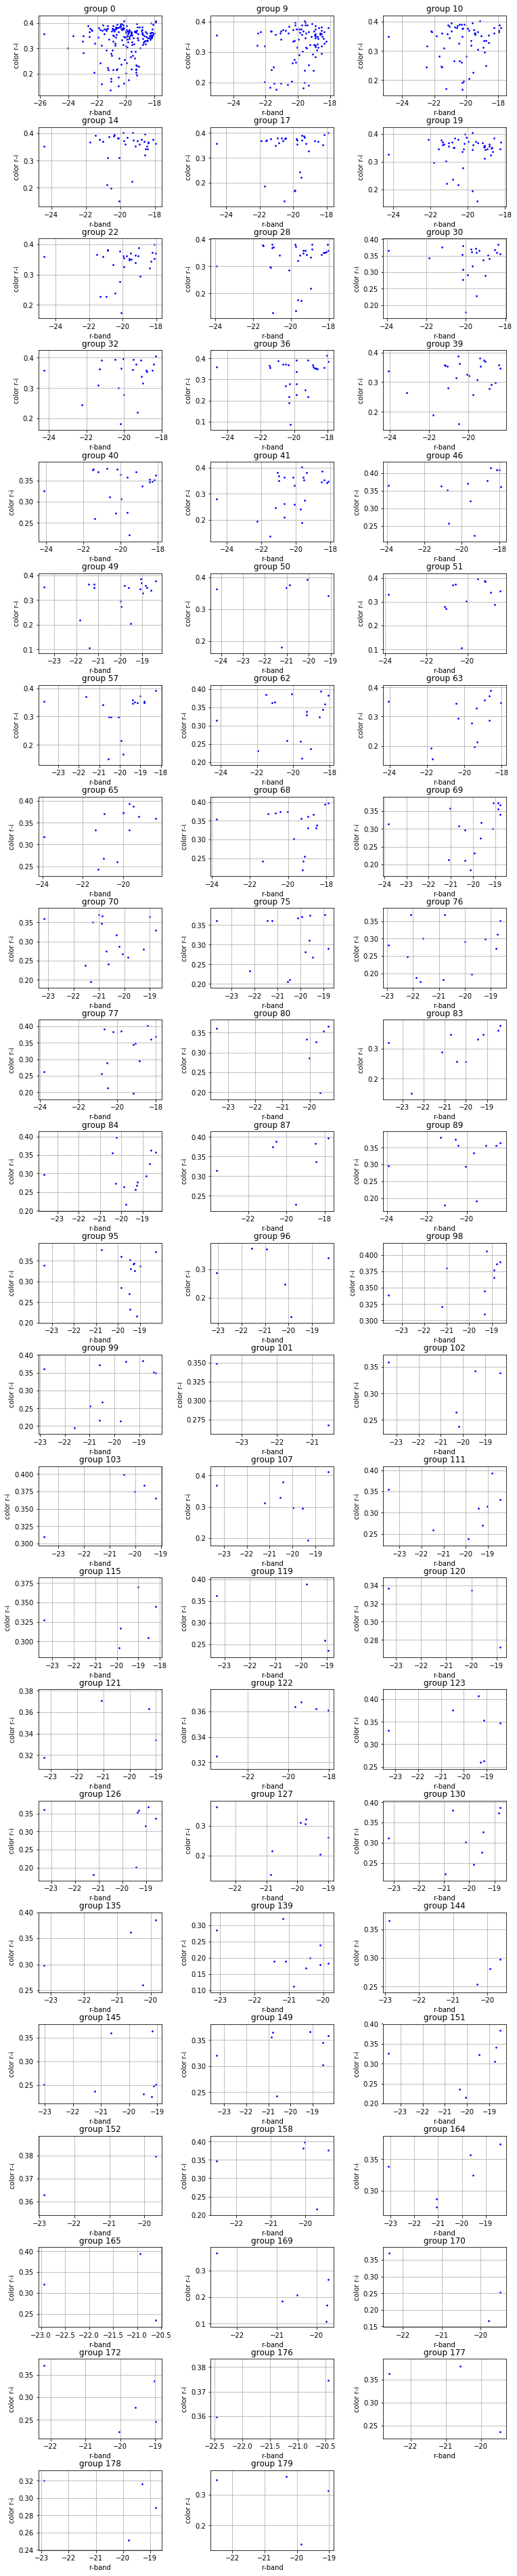

In [51]:
plt.figure(figsize=(12, 65))
for i in range(len(fossil_df)):
    y = subhalos['SubhaloStellarPhotometrics'][:,5][fossil_df.iloc[i,2]] - subhalos['SubhaloStellarPhotometrics'][:,6][[fossil_df.iloc[i,2]]] 
    x = subhalos['SubhaloStellarPhotometrics'][:,5][[fossil_df.iloc[i,2]]]
    plt.subplot(23, 3, i+1)
    plt.title(f'group {fossil_df.iloc[i,0]}')
    plt.grid()
    #plt.xlim(-26,-7.5)
    #plt.xticks(np.arange(-26, -6 ,2))
    plt.ylabel('color r-i')
    plt.xlabel('r-band')
    plt.scatter(x, y, s=3,color='blue')
    """
    nbins=90
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='gnuplot')
    plt.colorbar(label='density of points')
    #plt.savefig('cmdensitymagnitude.jpg')
    plt.show()
    """
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('gruposcolor.jpg')
    #probablemente es porque tienen menos masas los grupos finales
    #acotar particulas estelares

In [ ]:
plt.figure(figsize=(20,20))
y = subhalos['SubhaloStellarPhotometrics'][:,5][fossil_df.iloc[i,1]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][fossil1[0]]]     
x = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[0]]]
#plt.subplot(9, 8, i+1)
plt.title(f'grupo {fossil1[i]}')
plt.grid()
#plt.xlim(-26,-7.5)
#plt.xticks(np.arange(-26, -6 ,2))
plt.ylabel('color r-i')
plt.xlabel('r-band')
plt.scatter(x, y, s=10,color='blue')

In [73]:
fossil_df['number'][52]

145

## Sample

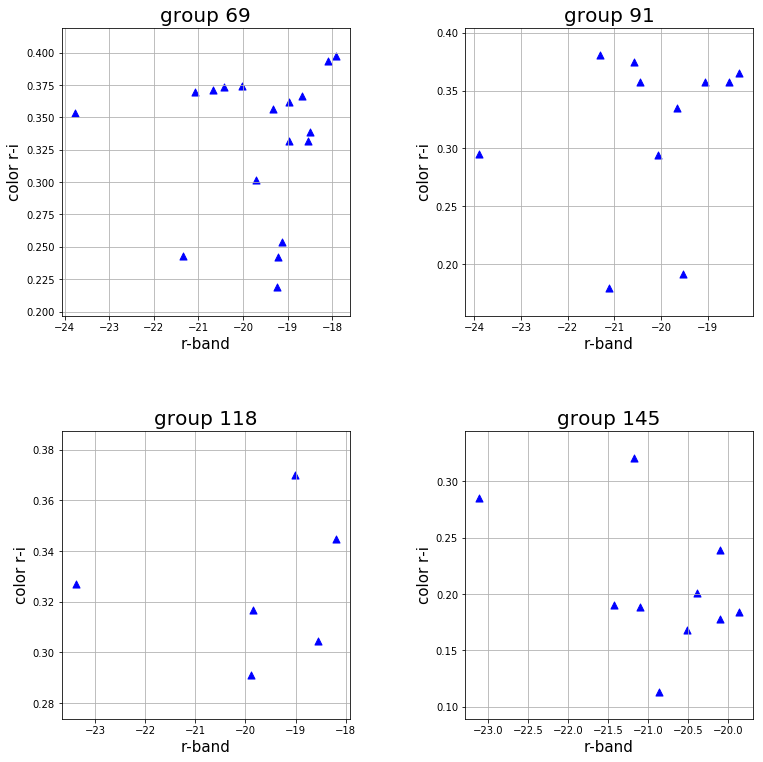

In [80]:
plt.figure(figsize=(12, 12))
fossil1 = [22,32,42,52]
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['SubhaloStellarPhotometrics', 'SubhaloGrNr']
#cambiar la masa total por la masa estelar que deberia estar en el array de masstype
snapNum = 99
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=fields)

for i in range(len(fossil1)):
    y = subhalos['SubhaloStellarPhotometrics'][:,5][fossil_df.iloc[fossil1[i],2]] - subhalos['SubhaloStellarPhotometrics'][:,6][fossil_df.iloc[fossil1[i],2]] 
    x = subhalos['SubhaloStellarPhotometrics'][:,5][fossil_df.iloc[fossil1[i],2]]
    plt.subplot(2, 2, i+1)
    plt.title(f'group {fossil_df.iloc[fossil1[i],1]}', fontsize=20)
    plt.grid()
    #plt.xlim(-26,-7.5)
    #plt.xticks(np.arange(-26, -6 ,1))
    plt.ylabel('color r-i',fontsize=15)
    plt.xlabel('r-band',fontsize=15)
    plt.scatter(x, y, s=50,color='blue', marker='^')
    """
    nbins=90
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='gnuplot')
    plt.colorbar(label='density of points')
    #plt.savefig('cmdensitymagnitude.jpg')
    plt.show()
    """
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.savefig('aaaaa.jpg')

In [ ]:
y = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[0]]] - subhalos['SubhaloStellarPhotometrics'][:,6][groups[1][fossil1[0]]] 
x = subhalos['SubhaloStellarPhotometrics'][:,5][groups[1][fossil1[0]]]
plt.figure(figsize=(7,7))
plt.title(f'grupo {fossil1[0]}')
plt.tick_params(axis='x',direction='in',top=True)
plt.tick_params(axis='y', direction='in', right=True)
#plt.xlim(-26,-7.5)
#plt.xticks(np.arange(-26, -6 ,1))
plt.ylabel('color r-i')
plt.xlabel('r-band')
plt.scatter(x, y, s=15,color='blue')
plt.savefig('grupo17.jpg')

In [ ]:
y = subhalos['SubhaloStellarPhotometrics'][:,5][subhalosfossil[0]] - subhalos['SubhaloStellarPhotometrics'][:,6][subhalosfossil[0]] 
x = subhalos['SubhaloStellarPhotometrics'][:,5][subhalosfossil[0]]
plt.figure(figsize=(7,7))
plt.title(f'grupo {fossil1[0]}')
plt.tick_params(axis='x',direction='in',top=True)
plt.tick_params(axis='y', direction='in', right=True)
#plt.xlim(-26,-7.5)
#plt.xticks(np.arange(-26, -6 ,1))
plt.ylabel('color r-i')
plt.xlabel('r-band')
plt.scatter(x, y, s=15,color='blue')
plt.savefig('grupo17.jpg')

In [45]:
subhalos['SubhaloStellarPhotometrics']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [44]:
y = subhalos['SubhaloStellarPhotometrics'][:,5][subhalosfossil[0]] - subhalos['SubhaloStellarPhotometrics'][:,6][subhalosfossil[0]] 
x = np.log10((subhalos['SubhaloMassType'][[subhalosfossil[0]],4])/0.6774) + 10
plt.figure(figsize=(7,7))
plt.title(f'grupo {fossil1[4]}')
plt.tick_params(axis='x',direction='in',top=True)
plt.tick_params(axis='y', direction='in', right=True)
#plt.xlim(-26,-7.5)
#plt.xticks(np.arange(-26, -6 ,1))
plt.ylabel('color r-i')
plt.xlabel('stellar mass $M_\odot$')
plt.scatter(x, y, s=15,color='blue')
plt.savefig('grupo17masa.jpg')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices